# Introdução (bem breve)  ao Python

## Sequência de Fibonacci

A sequência de Fibonacci precisa de 2 elementos iniciais, e o terceiro elemento é dado pela soma dos dois primeiros. Logo, um Fibonacci para 8 elementos seria algo do tipo:

1 2 3 5 8 13 21 34

Diga qual será o milionésimo termo do fibonacci, com o primeiro termo sendo 1, e o segundo sendo 3.

In [ ]:
import time 
print("Implementação do Fibonacci:")
start = time.time()
'''
Iniciar a implementação aqui:
'''

def fibonnacci(n,a,b):
    '''
    Retorna o enésimo número de fibonacci
    '''
    
    return

n = 6000
a = 1 
b = 3
resultado = fibonnacci(n,a,b)
end = time.time()
print("Tempo de execução: ", end - start)

print(f"O {n}é-simo termo na sequência de Fibonacci, iniciando com {a} e {b} é: {resultado}")

In [ ]:
'''
Implementação Performática de Fibonnaci (Fórmula de Lucas)
'''
from fiboRecursive import lucasNumber
import time

n = 20000
a = 1 
b = 3
print("Implementação do Fibonacci (Fórmula de Lucas):")
start = time.time()
lucasNumber(n)
end = end = time.time()
print("Tempo de execução: ", end - start)

print(f"O {n}é-simo termo na sequência de Fibonacci, iniciando com {a} e {b} é: {resultado}")

Nota-se como a fórmula de Lucas, dada por

$L(n) = (\dfrac{1+\sqrt{5}}{2})^n + (\dfrac{1-\sqrt{5}}{2})^n$

no mínimo 30 vezes mais performática.

No entanto, é impraticável procurar a solução mais performática para cada problema encontrado. Logo, utilizar bibliotecas já exaustivamente elaboradas é uma boa prática, pois garante a melhor solução, e nos permite concentrarmos na solução de problemas específicos.

# Exemplo 1: Curva sem deslocamento Inicial 


## Importação dos dados de ensaio

O primeiro passo para importar os dados é utilizar o biblioteca Pandas, do Python. Humildemente, disponibilizo uma biblioteca, baseada no Pandas, para auxiliar nessse processo: a `ReadExperimentalData`.

A classe aceita quatro parâmetros de entrada:

+ `archive_name`: Localização do arquivo;
+ `column_delimitador` = Delimitador de coluna;
+ `skiprows` = Linhas a serem puladas;
+ `decimal` : Separador decimal. 

Como exemplo, vamos ver o arquivo 'exemplo_latao.csv'.


In [ ]:
from experimentalTreatingIsiPol.main import ReadExperimentalData

'''
Utilizar a Classe ReadExperimentalData
'''

Outro passo importante é a visualização dos dados utilizando o `matplotlib`. A importação da biblioteca é efetuada através dos seguintes comandos:

```python
import matplotlib.pyplot as plt
```

In [ ]:
'''
Visualização dos dados pelo matplotlib
'''

Com os dados visualizados, pode-se decidir a região em que os dados mecânicos podem ser calculados. O módulo de elasticidade, por exemplo, é simplesmente a região linear inicial do diagrama tensão e deformação. Algumas normas, como em compósitos, definem uma regra fixa na região a ser analisada (como a 1 a 3%), por exemplo. Cada caso deve ser analisado separadamente. Mas como vai ser mostrado posteriormente, é possível definir uma regra geral.

De qualquer forma, para calcula o módulo de elasticidade deve-se definir uma região de tensão e de deformação, e simplesmente realizar um ajuste de um polinômio do primeiro grau. Isso é feito da seguinte forma:

```python
from scipy.optimize import curve_fit

def linear(x,a,b):
    return a*x+b

popt,_ = curve_fit(linear, x_linear, y_linear)
```

In [ ]:
'''
Definir a região linear do gráfico e ajustar um polinômio do primeiro grau
'''

Por fim, podemos também, programaticamente, encontrar a tensão de escoamento do material. A seguir, um exemplo de código para o cálculo da tensão de Escoamento:


```python
x_linear = np.linspace(0,x_max,100)
y_linear = [E*x for x in x_linear]
x_offset = x_linear + 0.002
y_interpolated = np.interp(x_offset, x,y)
def FindYield():
    minGlobal = min(abs(y_interpolated- y_linear))
    for each_i in range(len(y_interpolated)):
        if abs(y_interpolated[each_i]-y_linear[each_i])==minGlobal:
            return y_interpolated[each_i]
        
yieldPoint = FindYield()
```

Para alguns ensaios, esse processo já está automatizado. Precisa ainda de ser convencionado quanto ao nome das máquinas, e o processo está em desenvolvimento. Porém, para o ensaio acima, podemos utilizar as seguintes linhas de código:

```python
from experimentalTreatingIsiPol.main import MechanicalTestFittingLinear
```

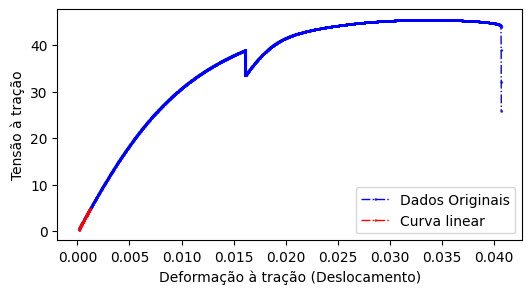

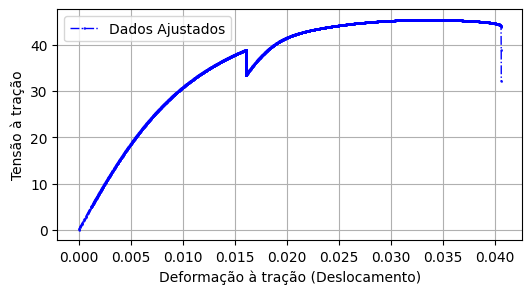

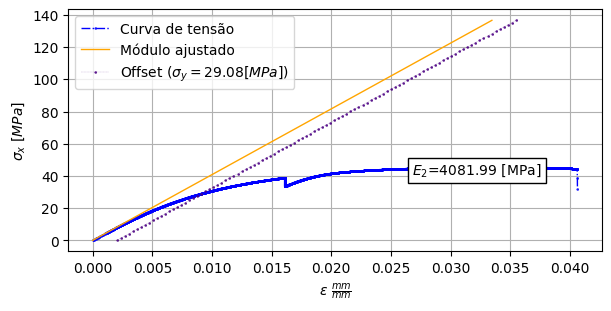

In [4]:
'''
Utilizando a lib experimentalTreatingIsiPol
'''
from experimentalTreatingIsiPol.main import MechanicalTestFittingLinear


arq_name = r"D:\Jonas\Mini Curso Python\experimental_data\exemplo_latao.csv"

ClassInit = MechanicalTestFittingLinear(machineName='68FM100', 
                                        archive_name=arq_name,
                                        materialType='metal',
                                        direction='paralell'
                                        )

ClassInit.MeasureYoungModulus(offset=0.002)

# Exemplo 2 : Curva com deslocamento Inicial

Caso a curva tenha um deslocamento inicial, devemos primeiro tirar a parte de deslocamento devido ao escorregamento/acomodação da garra, para que então prossigamos com o cálculo das constantes elásticas. A seguir, será já iniciado o código a leitura dos dados do ensaio.

Text(0, 0.5, 'Força [N]')

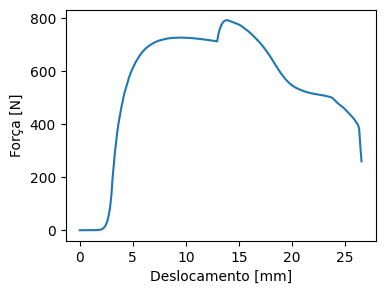

In [12]:
'''
Exemplo com um deslocamento inicial da amostra
'''
from experimentalTreatingIsiPol.main import ReadExperimentalData
import matplotlib.pyplot as plt
data = ReadExperimentalData(archive_name=r".\experimental_data\exemplo_curva_inicial.csv",
                            skiprows=0,
                            decimal=',',
                            column_delimitador=';'
                            )


data.raw_data.head()

displacement = data.raw_data['Extensometro']
force  = data.raw_data['Carga']

fig,ax =  plt.subplots(figsize=(4,3))
ax.plot(displacement, force)
ax.set_xlabel('Deslocamento [mm]')
ax.set_ylabel('Força [N]')

In [41]:
'''
Podemos usar outra biblioteca, que auxilia da visualização dos pontos (plotly)
'''
import plotly.graph_objects as go
from scipy.optimize import curve_fit

displacement = data.raw_data['Extensometro']
force = data.raw_data['Carga']


def linear(x,a,b):
    return a*x+b

fig = go.Figure()
fig.add_trace(go.Scatter(x=displacement, y=force, name='Dado Original'))
fig.update_layout(width=800, height=600)

x_inf = 2.97
x_sup = 3.12
x_linear = displacement[displacement>x_inf]
x_linear = x_linear[displacement<x_sup]
y_linear = data.raw_data[data.raw_data['Extensometro']>x_inf]
y_linear = y_linear[y_linear['Extensometro']<x_sup]['Carga']


popt,_ = curve_fit(linear, x_linear, y_linear)

a,b = popt
root = -b/a

new_y = [a*x+b for x in x_linear]

root
fig.add_trace(go.Line(x=x_linear.values, y=new_y, name='Plot Linear'))
fig.show()
print(x_linear.values)
print(new_y)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




[2.97297297 2.97597598 2.97897898 2.98198198 2.98498498 2.98798799
 2.99099099 2.99399399 2.996997   3.         3.         3.00336
 3.0067     3.01024    3.01409    3.01785    3.02172    3.02612
 3.03065    3.03484    3.03924    3.04365    3.04757    3.05092
 3.05397    3.05681    3.06016    3.06302    3.0654     3.06827
 3.07114    3.07424    3.07824    3.08221    3.08654    3.09086
 3.09495    3.09904    3.1034     3.10826    3.11371    3.1197    ]
[126.71295707878517, 128.42913418740864, 130.14531129603188, 131.86148840465557, 133.57766551327882, 135.29384262190206, 137.01001973052553, 138.726196839149, 140.44237394777247, 142.1585510563957, 142.1585510563957, 144.07874729969217, 145.98751380344538, 148.01057770263287, 150.2108025647433, 152.35959359890853, 154.57124820056265, 157.08579090011767, 159.67462690670482, 162.06915734105382, 164.58370004060885, 167.1039576099356, 169.34418656044818, 171.2586679339729, 173.00170321434643, 174.62472622951373, 176.53920760303845, 178.1736603

In [ ]:
'''
O procedimento para a limpeza é bem simples, mas exige alguns passos:
'''
# Exclusão dos dados inicias


# Extrapolação até a raiz da equação ajustada


# Desconto do offset inicial

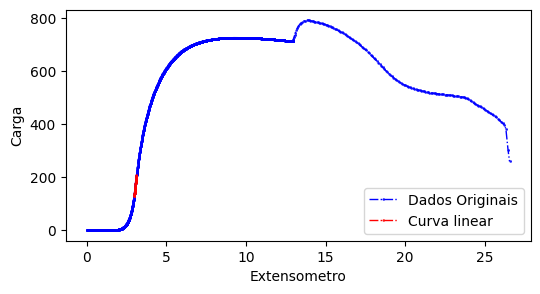

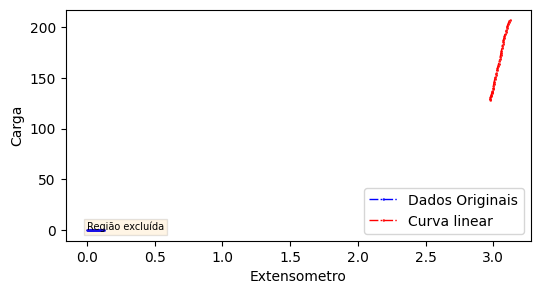

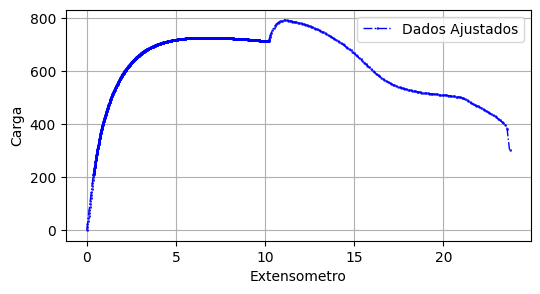

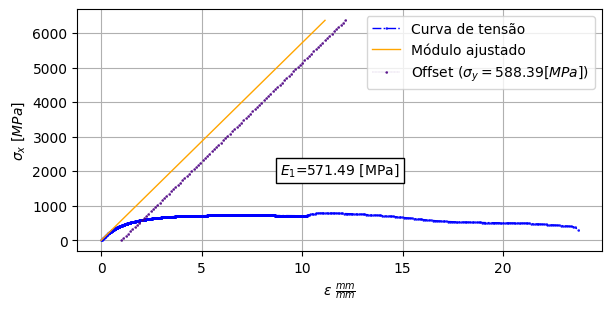

In [1]:
'''
Pode-se também utilizar a biblioteca desenvolvida
'''
from experimentalTreatingIsiPol.main import MechanicalTestFittingLinear
from experimentalTreatingIsiPol.machines._generalMachine import GeneralMachine
c = MechanicalTestFittingLinear(
                            'generalMachine', archive_name=r'.\experimental_data\exemplo_curva_inicial.csv',
                            materialType = 'metal',
                            direction = 'parallel',
                            linearRegionSearchMethod='custom',
                            x_min=2.97,
                            x_max=3.12,
                            generalMachineData=GeneralMachine(colunas=['id','Carga','Extensometro'],
                                                              decimal=',',
                                                              column_delimitador=';',
                                                              skip_rows=0,
                                                              x_column='Extensometro',
                                                              y_column='Carga'
                                                              )
)
c.MeasureYoungModulus(length=10, thickess=0.3, width=2, offset=1)

# Exemplo 3 : Exemplo de projeto
O procedimento acima poderia ser replicado de forma programática para diversos casos. Assim, poderia ser aplicada alguma estatística sobre os corpos de prova. Para tal, nesse momento vamos disponibilizar diretamente a biblioteca para auxiliar nesse processo. 

Ao tratar de diversos casos, deve-se utilizar a biblioteca `SeveralMechanicalTestingFittingLinear` da biblioteca `experimentalTreatingIsiPol`.



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\experimentalTreatingIsiPol\main.py:1329: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_YieldStress.show()
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\experimentalTreatingIsiPol\main.py:1330: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_YoungModuls.show()
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\experime

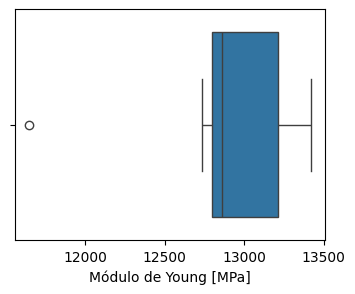

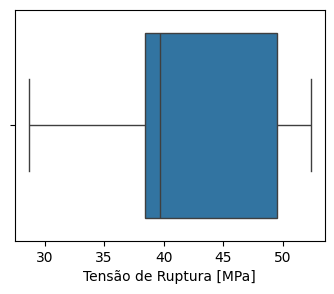

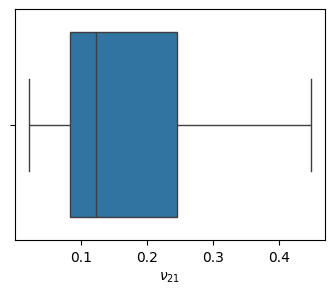

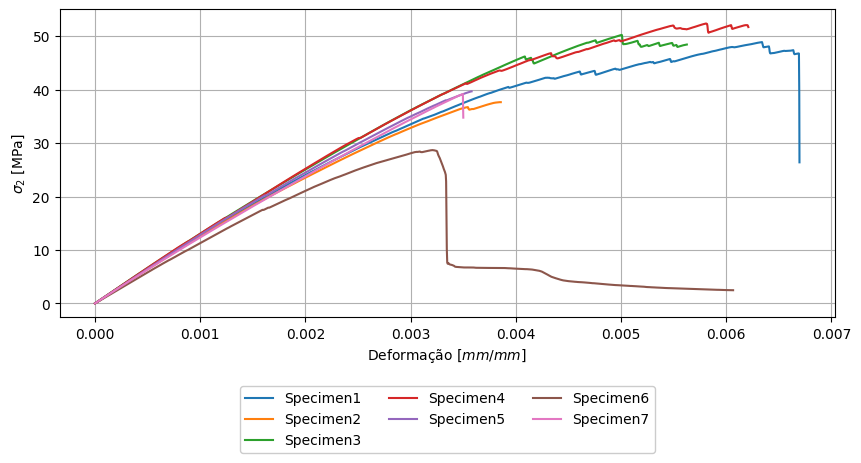

In [7]:
from experimentalTreatingIsiPol.main import SeveralMechanicalTestingFittingLinear

ClassInit = SeveralMechanicalTestingFittingLinear(
    archive_name=r'.\experimental_data\familia_composito\Specimen1.csv',
    machineName='68FM100_biaxial', 
    materialType='composite',
    direction='transversal',
    calculus_method='linearSearch',
    verbose=False
)